<a href="https://colab.research.google.com/github/LayneV/CS4410/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [4]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


In [9]:
print(gnb.score(X_test, y_test))


0.9736842105263158


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[40  3]
 [ 0 71]]


In [11]:
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



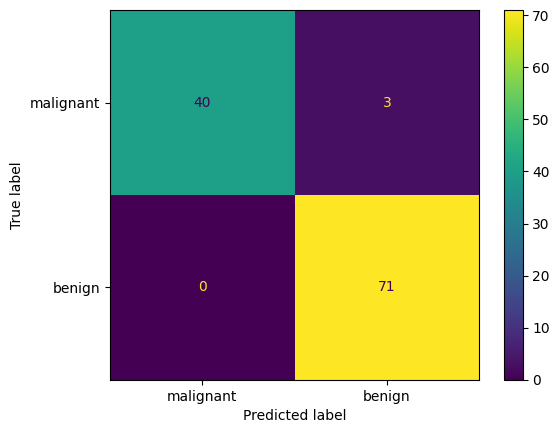

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()


In [24]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=nb, X=breast_cancer.data,
                         y=breast_cancer.target, cv=kfold)
print(scores)

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]


In [30]:
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

In [32]:
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_test, y_test)
    print(f"{name} accuracy: {score}")

GaussianNB accuracy: 0.9736842105263158
KNeighborsClassifier accuracy: 0.956140350877193
LogisticRegression accuracy: 0.956140350877193
SVC accuracy: 0.9473684210526315
